In [ ]:
pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


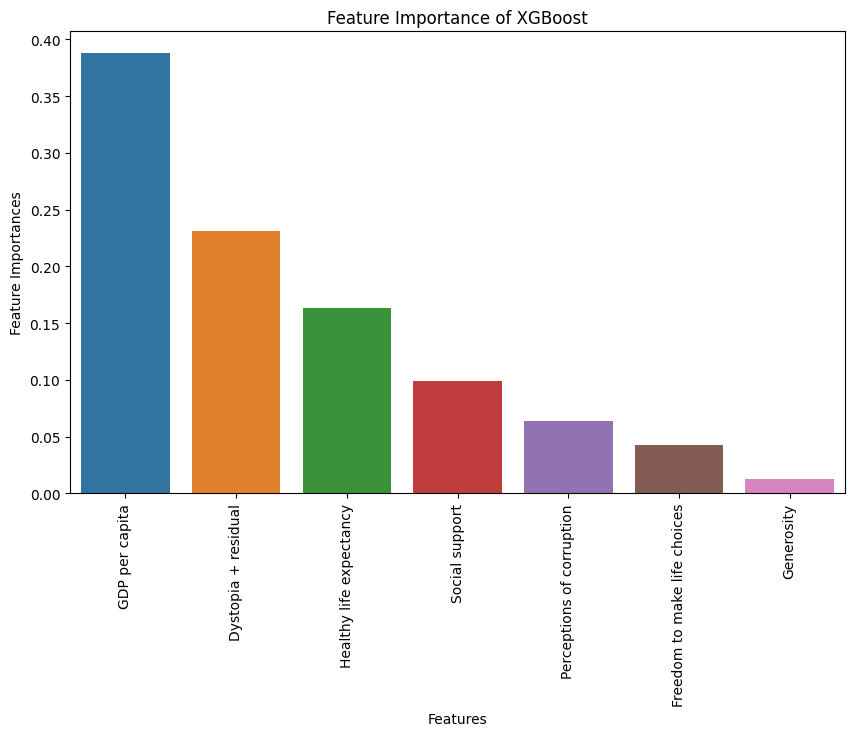

In [2]:
# 필요한 라이브러리를 import 합니다.
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터를 불러옵니다. 여기서는 'data.csv'라는 파일명으로 가정합니다.
df = pd.read_excel('happiness_world.xlsx')

# 특성 변수들을 X로, 타겟 변수를 y로 지정합니다.
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 
            'Generosity', 'Perceptions of corruption', 'Dystopia + residual']
X = df[features]
y = df['Score']

# XGBoost 모델을 학습시킵니다.
model = xgb.XGBRegressor()
model.fit(X, y)

# 피쳐 중요도를 추출합니다.
importances = model.feature_importances_

# 피쳐 중요도를 DataFrame으로 변환합니다.
feature_importances_df = pd.DataFrame({'Features': features, 'Importances': importances})

# 피쳐 중요도를 내림차순으로 정렬합니다.
feature_importances_df = feature_importances_df.sort_values(by='Importances', ascending=False)

# 피쳐 중요도를 시각화합니다.
plt.figure(figsize=(10,6))
sns.barplot(x='Features', y='Importances', data=feature_importances_df)
plt.ylabel('Feature Importances')
plt.xlabel('Features')
plt.title('Feature Importance of XGBoost')
plt.xticks(rotation=90)  # X축에 피쳐 이름을 표시하며, 이름이 길 경우 겹치지 않도록 90도 회전시킵니다.
plt.show()


In [ ]:
# 데이터를 학습 데이터와 테스트 데이터로 분리합니다. 이 때, test_size=0.2는 전체 데이터의 20%를 테스트 데이터로 사용하겠다는 의미입니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델을 학습 데이터로 다시 학습시킵니다.
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# MSE를 계산합니다.
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0343042740302078
